# Customer Churn Analysis

In [2]:
import pandas as pd
Telecom_customer_churn=pd.read_csv("Telecom_customer_churn.csv",sep=",") #reading Telecom_customer_churn.csv file
Telecom_customer_churn.head() #Looking into top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
Telecom_customer_churn.shape

(7043, 21)

In [4]:
Telecom_customer_churn.dtypes #Checking the datatype of each attribute

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As per problem statement Target variable i.e. Churn is Object. so we'll use Classification to learn our model

## Exploratory Data Analysis
## Handling Null Values

<AxesSubplot:>

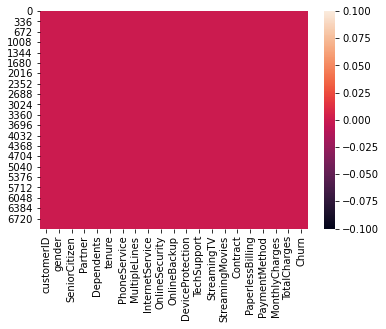

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(Telecom_customer_churn.isnull()) #Looking for null values if any, in heatmap

We don't have any null value in TotalCharges, let's try to convert the TotalCharges to numberical value as it contains numbers:

In [6]:
Telecom_customer_churn['TotalCharges'] = pd.to_numeric(Telecom_customer_churn['TotalCharges'], errors='coerce')
#coerce will change all error values to Nan(Which is non numeric)

#lets check the null values now
Telecom_customer_churn['TotalCharges'].isnull().sum()

11

In [7]:
#We can see total charges column has some relationship with tenure and monthly charges i.e tenure * monthly charges + additional charges = total charge.
Telecom_customer_churn.loc[(pd.isnull(Telecom_customer_churn.TotalCharges)), 'TotalCharges'] = Telecom_customer_churn.tenure * Telecom_customer_churn.MonthlyCharges

In [8]:
Telecom_customer_churn['TotalCharges'].isnull().sum()

0

In [9]:
#We'll drop customerID becuase is unique and it's not gonna help us to predict anything
Telecom_customer_churn.drop('customerID', axis=1, inplace=True)

In [10]:
#Getting only object labels in Obj_label list
Obj_label=list(Telecom_customer_churn.select_dtypes(['object']).columns)

In [11]:
Obj_label

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

## Univariate Analysis

Male      3555
Female    3488
Name: gender, dtype: int64


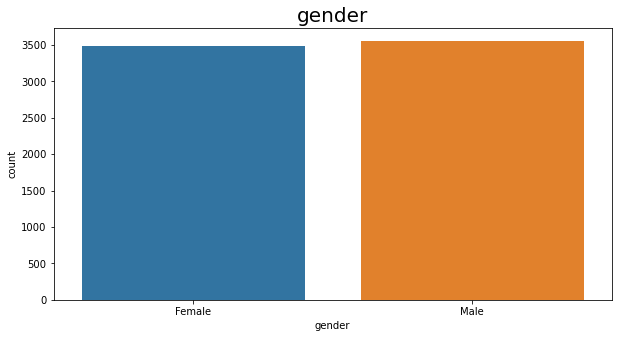

No     3641
Yes    3402
Name: Partner, dtype: int64


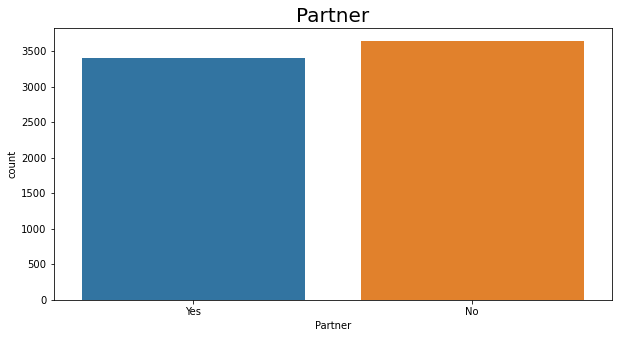

No     4933
Yes    2110
Name: Dependents, dtype: int64


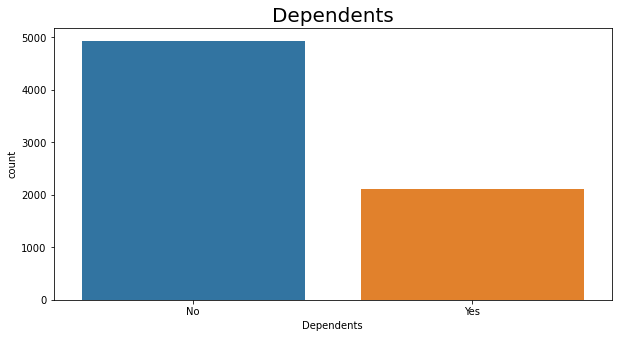

Yes    6361
No      682
Name: PhoneService, dtype: int64


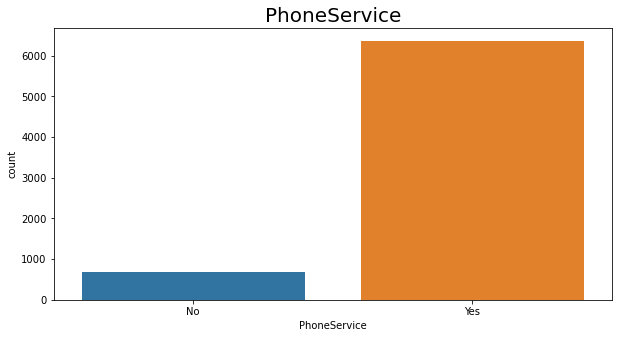

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


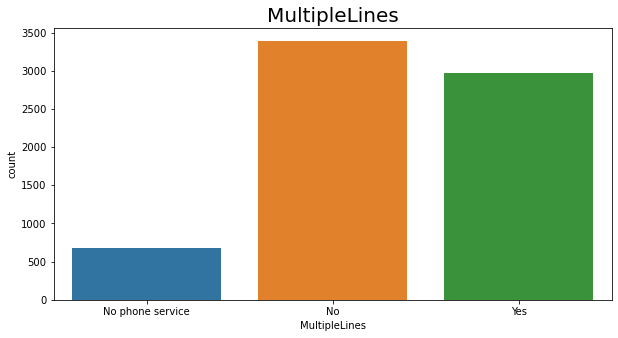

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


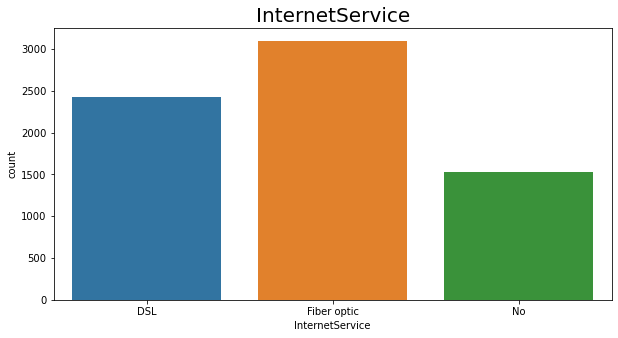

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


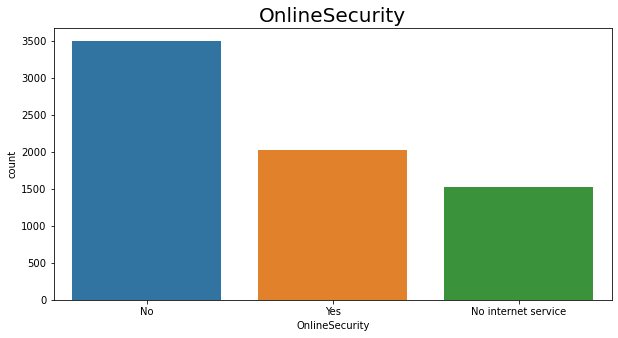

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


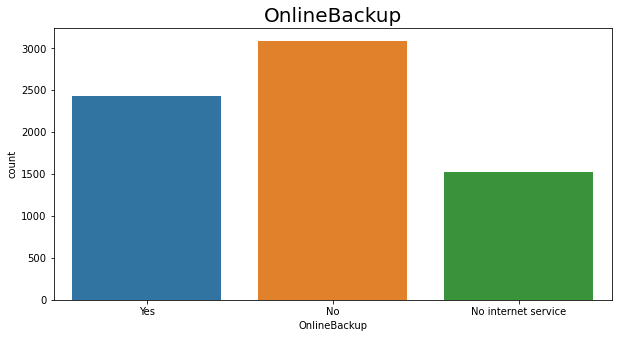

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


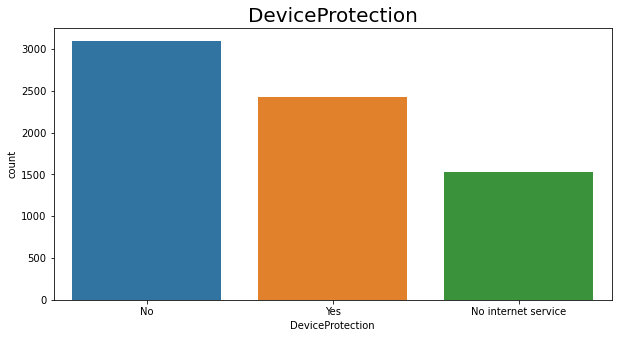

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


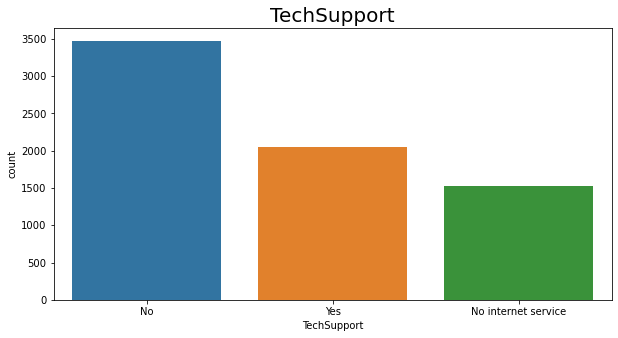

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


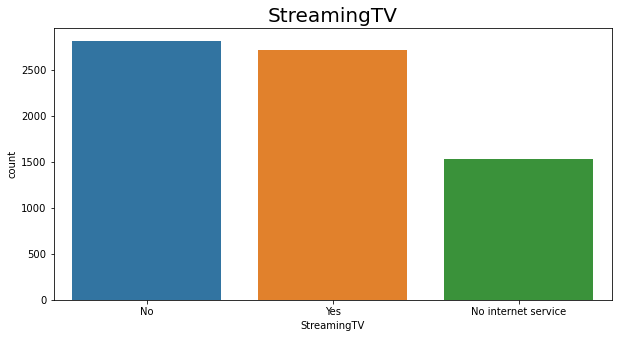

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


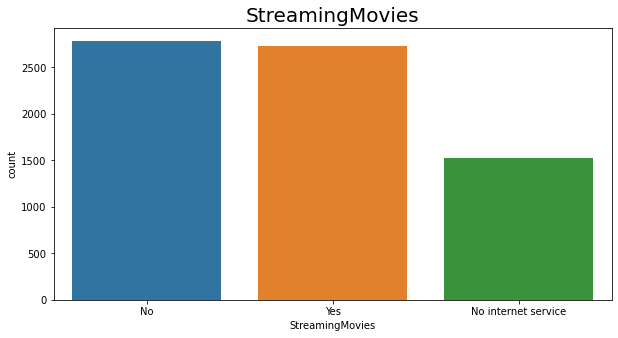

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


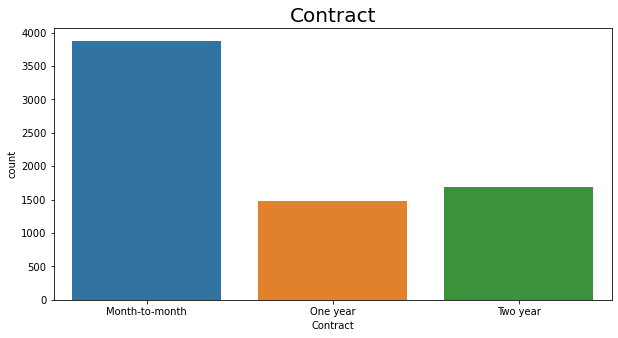

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


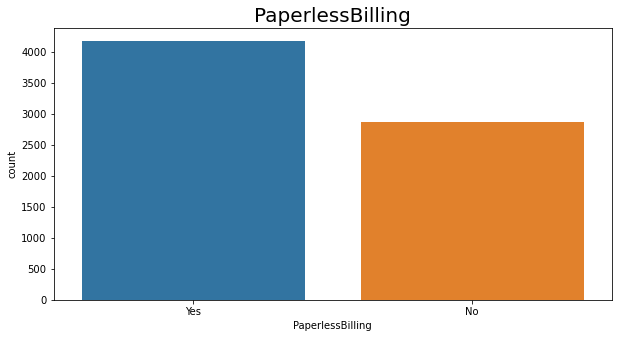

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


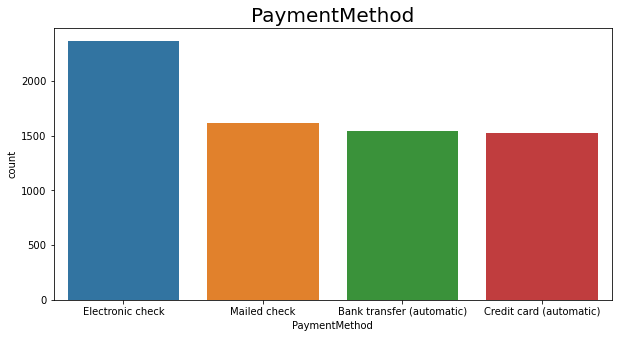

No     5174
Yes    1869
Name: Churn, dtype: int64


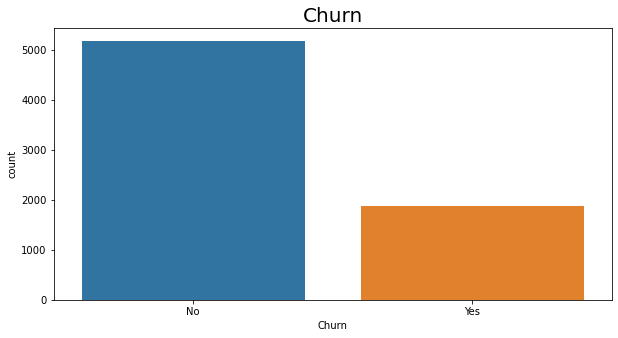

In [12]:
import matplotlib.pyplot as plt
for i in Obj_label:
    print(Telecom_customer_churn[i].value_counts())
    plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
    sns.countplot(x=Telecom_customer_churn[i]) #Plotting Countplot for all the object columns
    plt.title(i, fontsize = 20) #Setting up the title
    plt.show() #plotting the graph

## Bi-variate Analysis

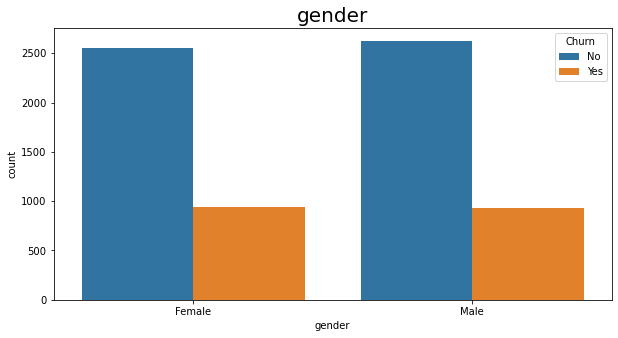

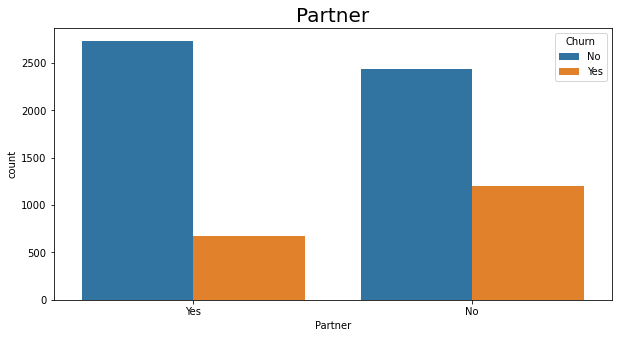

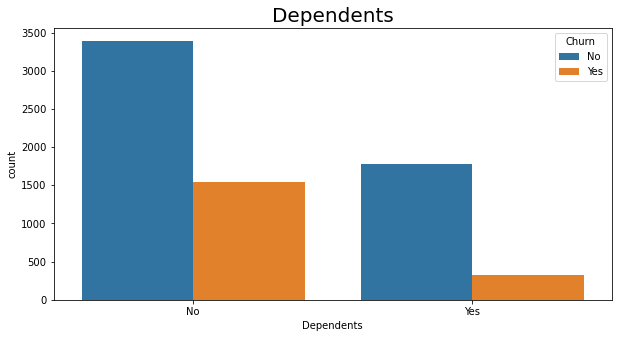

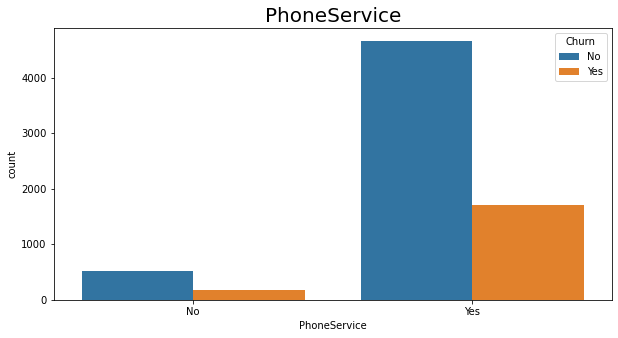

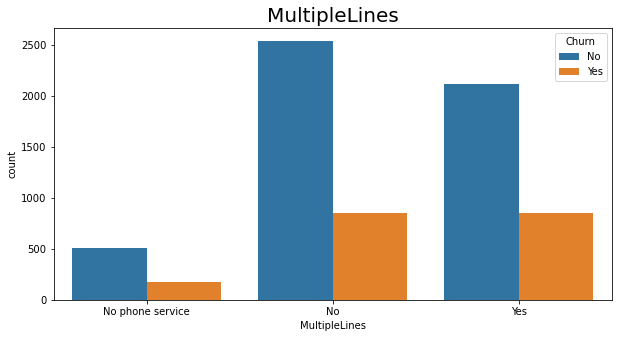

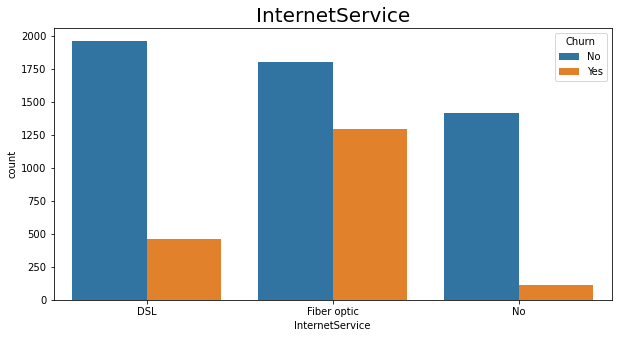

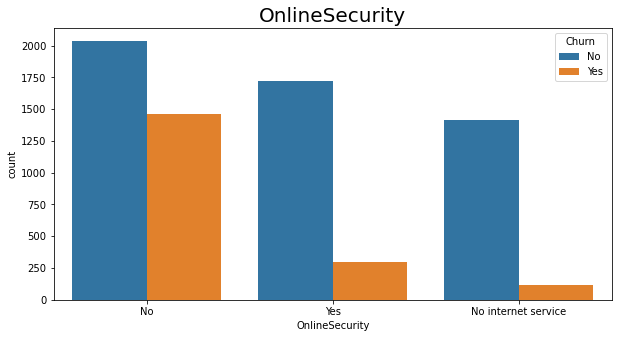

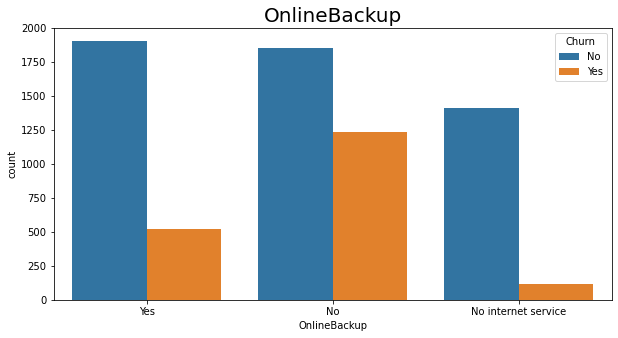

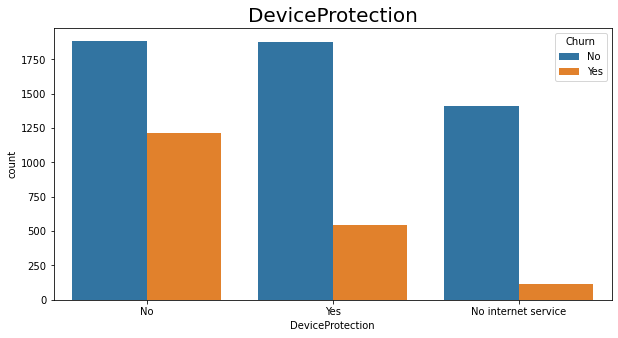

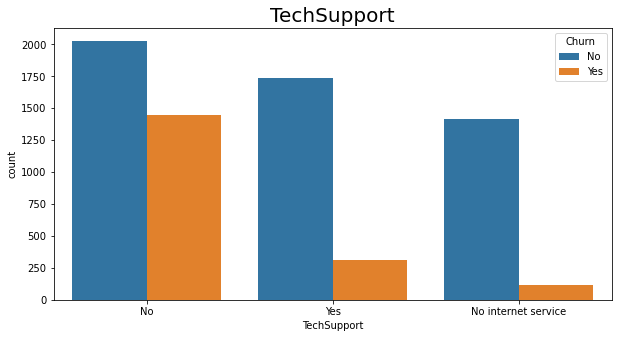

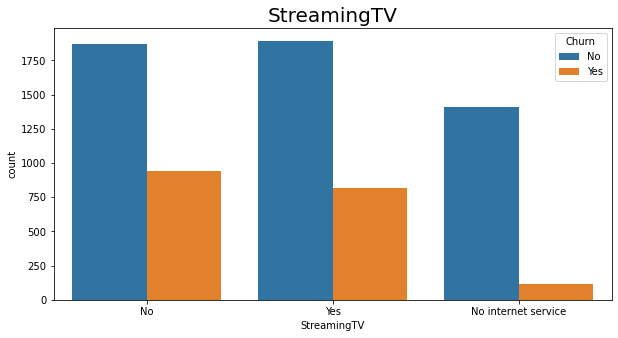

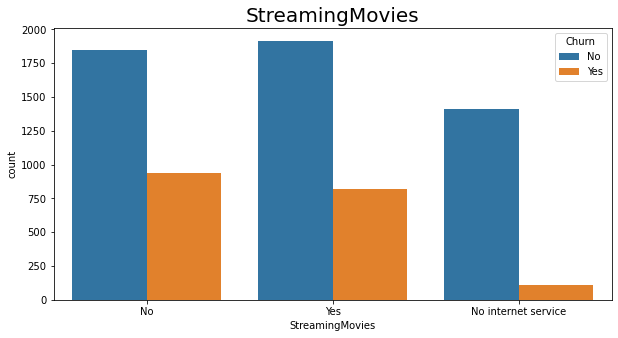

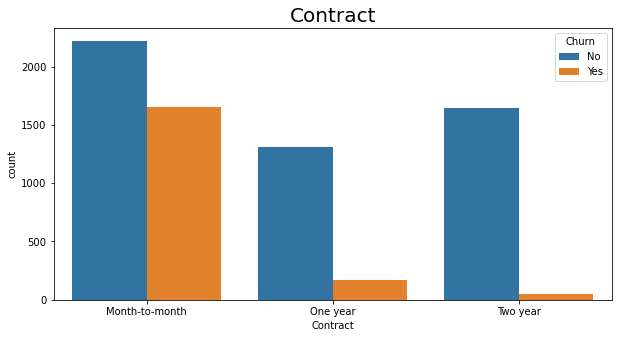

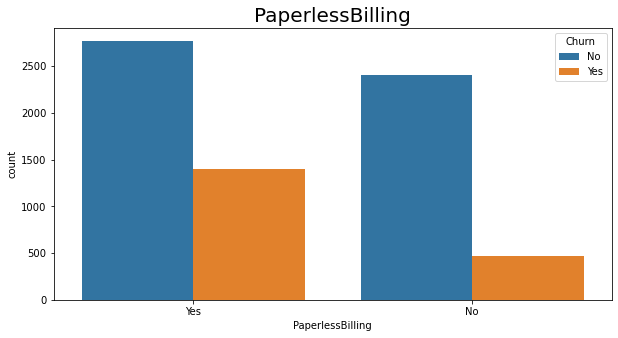

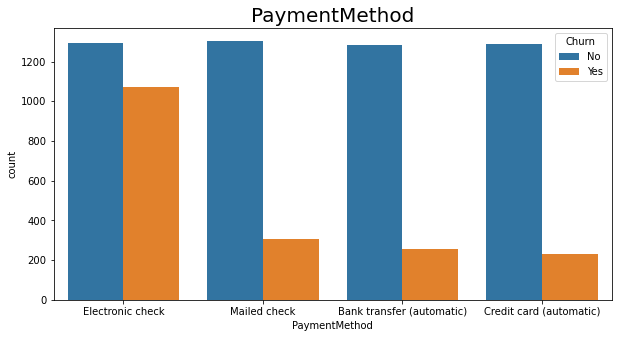

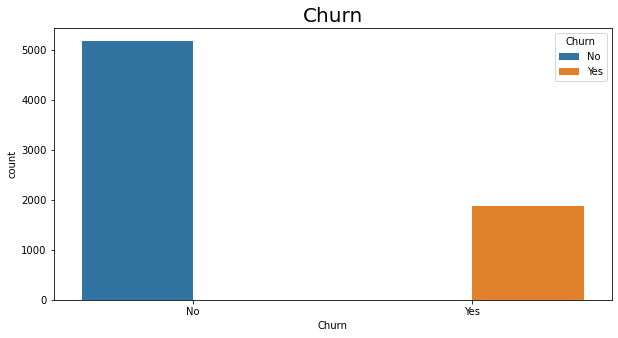

In [13]:
import matplotlib.pyplot as plt
for i in Obj_label:
    plt.figure(figsize = (10,5)) #Plotting with size of 10 * 5
    sns.countplot(x=Telecom_customer_churn[i],hue=Telecom_customer_churn['Churn']) #Plotting Countplot for object columns
    plt.title(i, fontsize = 20) #Setting up the title
    plt.show() #plotting the graph

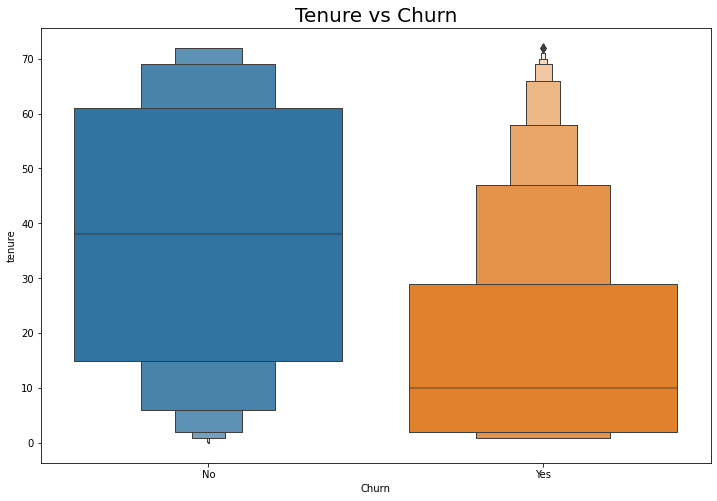

In [14]:
#Plotting boxenplot for Tenure and Churn
plt.figure(figsize = (12,8))
sns.boxenplot(Telecom_customer_churn['Churn'], Telecom_customer_churn['tenure'])
plt.title('Tenure vs Churn', fontsize = 20)
plt.show()

Churned density is more when Tensure is between 0-30.

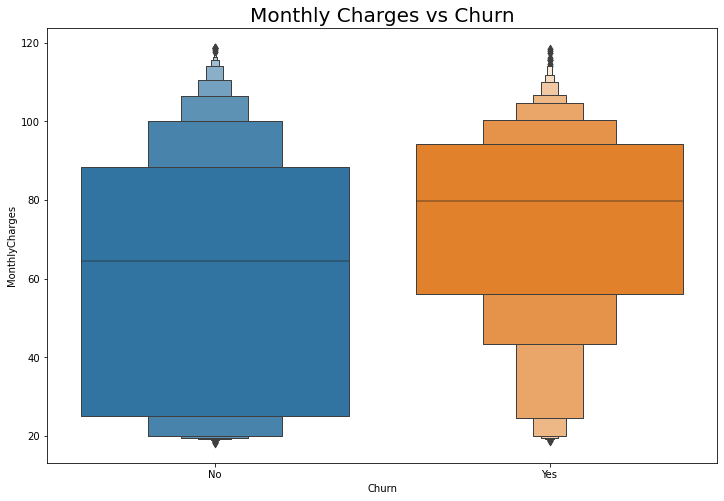

In [15]:
#Plotting boxenplot for MonthlyCharges and Churn
plt.figure(figsize = (12,8))
sns.boxenplot(Telecom_customer_churn['Churn'], Telecom_customer_churn['MonthlyCharges'])
plt.title('Monthly Charges vs Churn', fontsize = 20)
plt.show()

Churned Density is heigh when Monthly Charges is between 60-90,

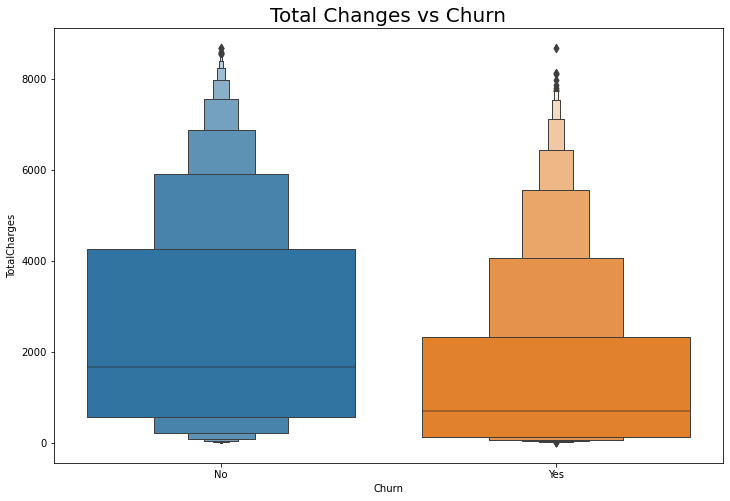

In [16]:
#Plotting boxenplot for TotalCharges and Churn
plt.figure(figsize = (12,8))
sns.boxenplot(Telecom_customer_churn['Churn'], Telecom_customer_churn['TotalCharges'])
plt.title('Total Changes vs Churn', fontsize = 20)
plt.show()

Churned density is high when Total charges is between 0-2200 approx.

## Label Encoding

In [17]:
#Label encoding for the object columns
label_list=list(Telecom_customer_churn.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    Telecom_customer_churn[i] = le.fit_transform(Telecom_customer_churn[i])

In [18]:
Telecom_customer_churn.head() #Looking into first 5 rows of data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Multi-Variate Analysis

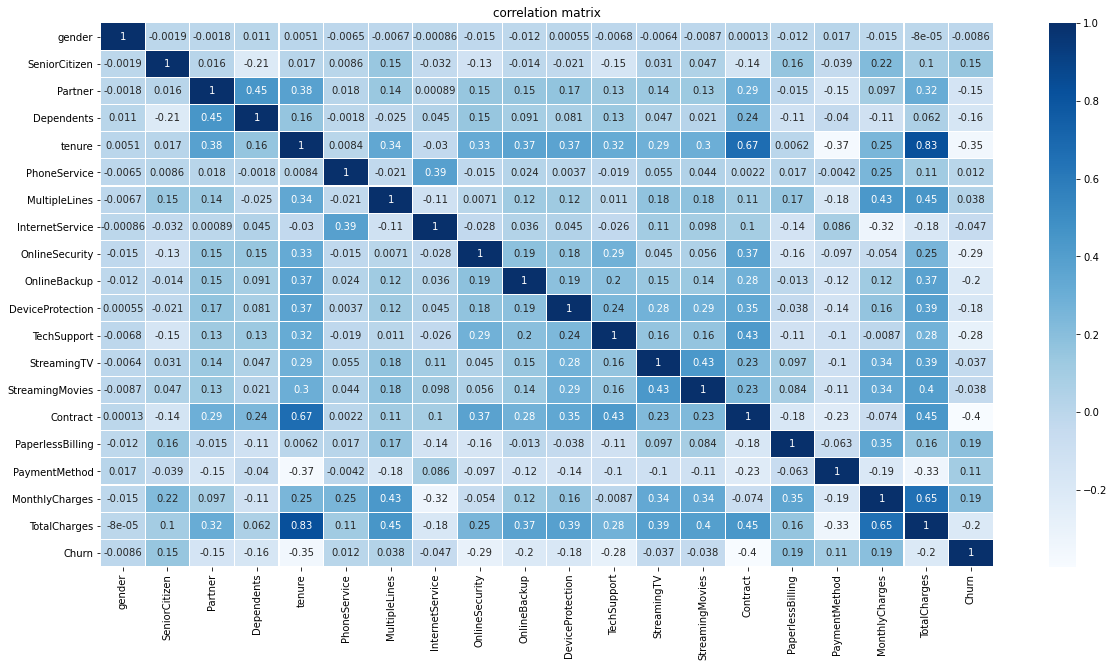

In [19]:
#Multivariate Analysis
fig=plt.figure(figsize=(20,10))
hc=Telecom_customer_churn.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

Churn have high corelation with Tenure i.e. -35% and than with OnlineSecurity i.e. -29%

In [20]:
Telecom_customer_churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Column like Monthly charges and Total Charges have extreme high values as compare with other columns, So we'll do scaling. There is hue difference in mean median std of Total changes, so we need to remove the skewness as well.

In [21]:
#Checking the Correlation with Churn in sorted order
cor_mtx=Telecom_customer_churn.corr()
cor_mtx['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.198324
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [22]:
#Corelation of Gender of too low i.e. negligible, So we are dropping it.
Telecom_customer_churn.drop('PhoneService', axis=1, inplace=True)

## Removing Skewness and Outliers

In [23]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(Telecom_customer_churn))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


<AxesSubplot:xlabel='tenure'>

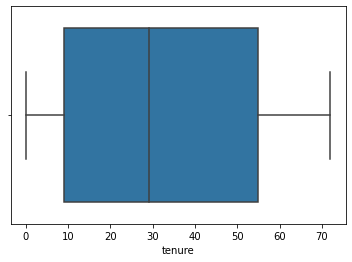

In [24]:
sns.boxplot(x=Telecom_customer_churn['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

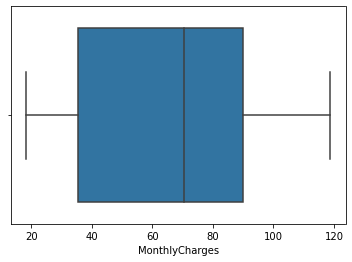

In [25]:
sns.boxplot(x=Telecom_customer_churn['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

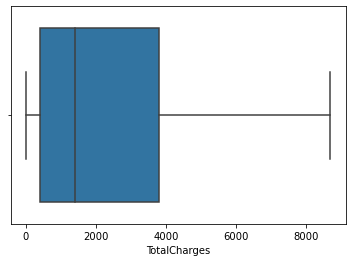

In [26]:
sns.boxplot(x=Telecom_customer_churn['TotalCharges'])

No outliers present in data.

In [28]:
Telecom_customer_churn['TotalCharges'].skew()

0.963234654832277

In [29]:
Telecom_customer_churn['MonthlyCharges'].skew()

-0.22052443394398033

In [30]:
Telecom_customer_churn['tenure'].skew()

0.2395397495619829

In [31]:
#Removing skewness of TotalCharges columns
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
Telecom_customer_churn['TotalCharges']=PT.fit_transform(Telecom_customer_churn['TotalCharges'].values.reshape(-1,1))

In [32]:
Telecom_customer_churn['TotalCharges'].skew()

-0.1461205173267185

Skewness is not present in data now.

## Seprate independent variable and target variable

In [33]:
x = Telecom_customer_churn.drop("Churn", axis=1)
y = Telecom_customer_churn["Churn"]

## Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data
#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.152113
1,1.0,0.0,0.0,0.0,0.472222,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.640684
2,1.0,0.0,0.0,0.0,0.027778,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.251799
3,1.0,0.0,0.0,0.0,0.625000,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.635673
4,0.0,0.0,0.0,0.0,0.027778,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.284170


## Finding Best Random State

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8192143871273071  on Random_state  129


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [38]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [39]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.8192143871273071
[[1444  133]
 [ 249  287]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1577
           1       0.68      0.54      0.60       536

    accuracy                           0.82      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.81      0.82      0.81      2113

[0.80837473 0.80269695 0.79134138 0.81178977 0.80326705]
0.8034939754177689
Difference between Accuracy score and cross validation score is -  0.015720411709538196
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||

Random Forest Classifier model have heighest accuracy i.e. 80% with 79.12% cross validation score which is good and the difference is too less.

## Hyper Parameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':["gini", "entropy"],
            'splitter':["best", "random"],
            'random_state':range(0,20), 
            'min_samples_split':[1,2,3,4,5],
            'min_samples_leaf':[1,2,3,4,5],
            'min_impurity_decrease':[0.0,1.0,2.0],
            'min_weight_fraction_leaf':[0.0,1.0,2.0],
            'max_depth':[None],
            'max_leaf_nodes':[None],
            'class_weight':[None],
            'max_features':[None]}

clf = GridSearchCV(DecisionTreeClassifier(), parameters,cv=5)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5,
 'splitter': 'random'}

In [41]:
clf_pred=clf.best_estimator_.predict(x_test) #prediting result based on test based

In [42]:
accuracy_score(y_test,clf_pred) #finding accuracy score of the data

0.7884524372929484

In [43]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.7884524372929484
[[1397  180]
 [ 267  269]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1577
           1       0.60      0.50      0.55       536

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



Our model learnt almost 77%

## AUC ROC curve

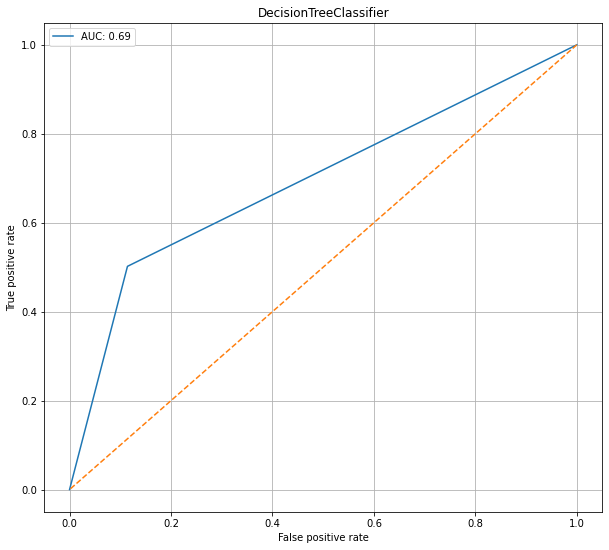

In [44]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

## Saving the model

In [45]:
import joblib
joblib.dump(clf.best_estimator_,"PJ9_Telecome_Customer_Churn.obj")
SVR_from_joblib=joblib.load("PJ9_Telecome_Customer_Churn.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021